# Libraries

In [14]:
import pandas as pd
import numpy as np

import re
import emoji

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split

import tensorflow as tf

# Load The Dataset

In [2]:
df = pd.read_csv('C:/Users/firma/Documents/Python/ML + BE/NLP/Tweet Sentiment Analysis/ML/Data/sentiment_tweets3.csv')
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


# Data Information

In [3]:
df.rename(columns={'message to examine': 'Text', 'label (depression result)': 'Label'}, inplace=True)
df.head()

,Index,Text,Label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Index   10314 non-null  int64 
 1   Text    10314 non-null  object
 2   Label   10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [5]:
obj = [col for col in df.columns if df[col].nunique() <= 10]

for col in obj:
  print(f"Column: {col}")
  print(f"Number of Unique Values (nunique): {df[col].nunique()}")
  print(f"Unique Values: {df[col].unique()}")
  print("Value Counts:")
  print(df[col].value_counts())
  print("-" * 50)

Column: Label
Number of Unique Values (nunique): 2
Unique Values: [0 1]
Value Counts:
Label
0    8000
1    2314
Name: count, dtype: int64
--------------------------------------------------


# Data Cleaning

In [6]:
df.duplicated().sum()

0

# Data Preprocessing

## Text Cleaning

In [7]:
def clean_text(text):
   text = re.sub(r"http\S+|www\S+", "", text) # URL
   text = re.sub(r"<.*?>", "", text) #HTML
   text = re.sub(r"[^\w\s]", "", text) # Punctuation
   text = text.lower()
   return emoji.demojize(text)

In [8]:
df['Text'] = df['Text'].apply(clean_text)

In [9]:
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

def replace_chat_words(text):
    words = text.split()
    for i, word in enumerate(words):
        if word.lower() in chat_words:
            words[i] = chat_words[word.lower()]
    return ' '.join(words)

df['Text'] = df['Text'].apply(replace_chat_words)

In [10]:
df.head()

,Index,Text,Label
0,106,just had a real good moment i missssssssss him...,0
1,217,is reading manga,0
2,220,comeagainjen,0
3,288,lapcat need to send em to my accountant tomorr...,0
4,540,add me on myspace myspacecomlookthunder,0


## Stopword and Lemmatizer

In [11]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

def remove_stopwords_lemmatize(text):
  stop_words = set(stopwords.words('english'))
  lemmatizer = WordNetLemmatizer()
  words = text.split()
  words = [lemmatizer.lemmatize(word, pos='v') for word in words if word not in stop_words]
  return ' '.join(words)

df['Text'] = df['Text'].apply(remove_stopwords_lemmatize)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\firma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\firma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\firma\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Index,Text,Label
0,106,real good moment missssssssss much,0
1,217,read manga,0
2,220,comeagainjen,0
3,288,lapcat need send em accountant tomorrow oddly ...,0
4,540,add myspace myspacecomlookthunder,0


# Data Modeling

## Train Test Split

In [13]:
X = df['Text']
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Tokenization and Padding Sequences

In [15]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token = 'nothing')
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

In [16]:
tokenizer.document_count


10314

In [17]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [18]:
maxlen = max(len(tokens) for tokens in X_train_sequences)
print("Maximum sequence length (maxlen):", maxlen)

Maximum sequence length (maxlen): 83


In [20]:
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train_sequences, maxlen=maxlen, padding='post')
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')

In [21]:
print("X_train_padded:")
print(X_train_padded)
print("\nX_test_padded:")
print(X_test_padded)

X_train_padded:
[[   18   364   897 ...     0     0     0]
 [    5  3593   598 ...     0     0     0]
 [ 5561  5562     3 ...     0     0     0]
 ...
 [17514   918     0 ...     0     0     0]
 [  269  1708  3208 ...     0     0     0]
 [  428     5  1047 ...     0     0     0]]

X_test_padded:
[[17515   377   143 ...     0     0     0]
 [17516   703   188 ...     0     0     0]
 [17517    93   114 ...     0     0     0]
 ...
 [20501 20502 20503 ...     0     0     0]
 [20504   211    72 ...     0     0     0]
 [ 1614  3781   627 ...     0     0     0]]


## Input Size

In [22]:
input_Size = np.max(X_train_padded) + 1
input_Size

17515

## Model Buidling

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(75, 1), return_sequences=True),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

C:\Users\firma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 75, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,465 (806.50 KB)

 Trainable params: 206,465 (806.50 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))

Epoch 1/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.8022 - loss: 0.5090 - val_accuracy: 0.8274 - val_loss: 0.4538
Epoch 2/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.8235 - loss: 0.4579 - val_accuracy: 0.8362 - val_loss: 0.4266
Epoch 3/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - accuracy: 0.8326 - loss: 0.4257 - val_accuracy: 0.8551 - val_loss: 0.2969
Epoch 4/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - accuracy: 0.9101 - loss: 0.2294 - val_accuracy: 0.9680 - val_loss: 0.0981
Epoch 5/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - accuracy: 0.9678 - loss: 0.1140 - val_accuracy: 0.9806 - val_loss: 0.0742


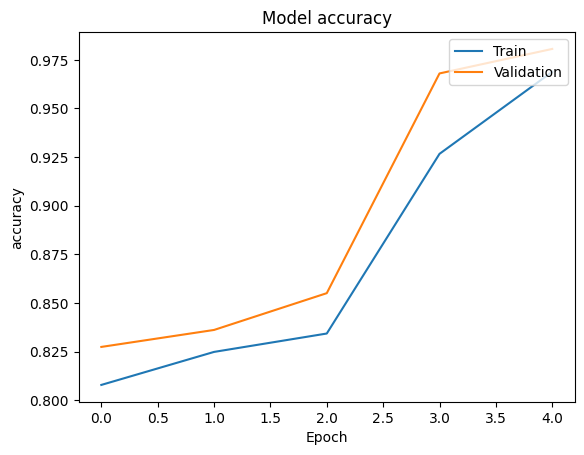

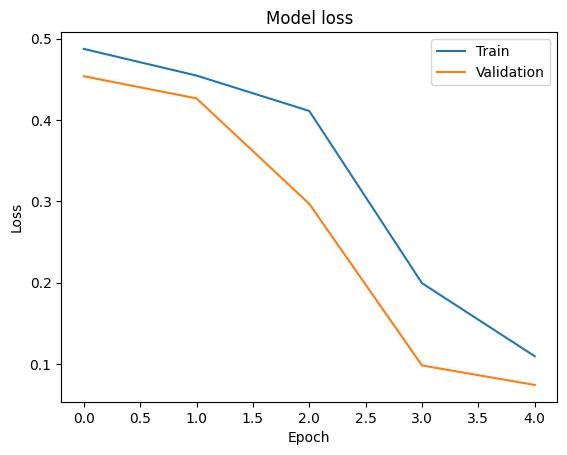

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [27]:
model.save('../Model/sentiment_model.h5')